In [1]:
from scipy import misc
from scipy import signal
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Definimos algunas funciones 

"""
Esta funcion realiza un filtro gaussiano para eliminar el ruido
"""
def filtroGaussiano(image, s=5):
    n = int(6*s + 0.5)
    f = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            f[i,j] = np.exp((-(i-n/2)**2-(j-n/2)**2)/(2*s**2))
    k = np.sum(f)
    f = f/k
    
    return signal.convolve2d(image, f, boundary="symm")
    
    
    
    
"""
Esta funcion realiza un filtro de bordes simple.
Se espera recibir una imagen con un filtro pasa baja aplicado y retorna una matriz con el filtro de bordes
"""
def filtroBordes(image, umbral = 3):
    # Se crea dos matriz de ceros segun el tamaño
    # Ib = matriz de bordes 
    # Ig = matriz con resultado del gradiente
    Ib, Ig = np.zeros(image.shape), np.zeros(image.shape)
    
    # Filtros derivadores
    f_v, f_h = np.array([[0, -1, 0], [0, 1, 0]]), np.array([[0,0],[-1,1],[0,0]])
    
    # Convolucion
    Ix, Iy = signal.convolve2d(image, f_h, boundary="symm"), signal.convolve2d(image, f_v, boundary="symm")

    # Gradiente
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            Ig[r][c] = ( (Ix[r][c]**2) + (Iy[r][c]**2) )**(1/2.0)
            # se aplica el filtro
            Ib[r][c] = 255 if Ig[r][c] >= umbral else 0

    print Ig.max(), Ig.min()
    
    return Ib

c:\python27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


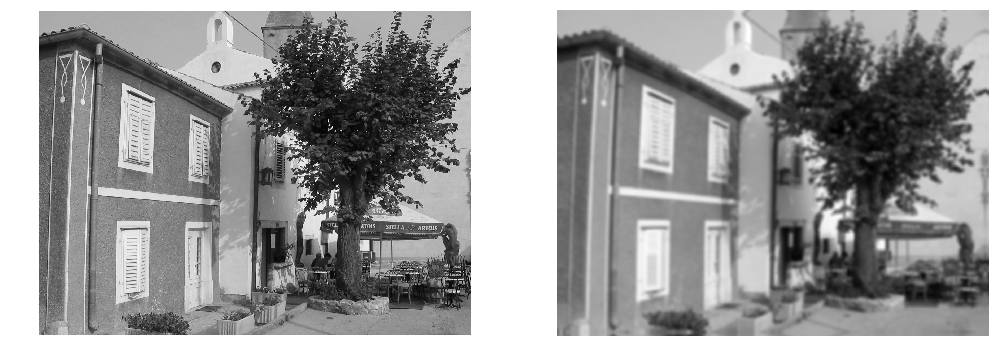

In [3]:
# Cargamos la imagen
imagenOriginal = misc.imread("foto.jpg",mode="L")

# Aplicamos un filtro paso-bajo para eliminar el ruido
imagenConFiltroGaussiano = filtroGaussiano(imagenOriginal)

# Mostramos los cambios
plt.figure(figsize=(17,17))
plt.subplot(121)
plt.imshow(imagenOriginal,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(imagenConFiltroGaussiano, cmap = "gray")
plt.axis("off")
plt.show()

13.387133258875773 0.0


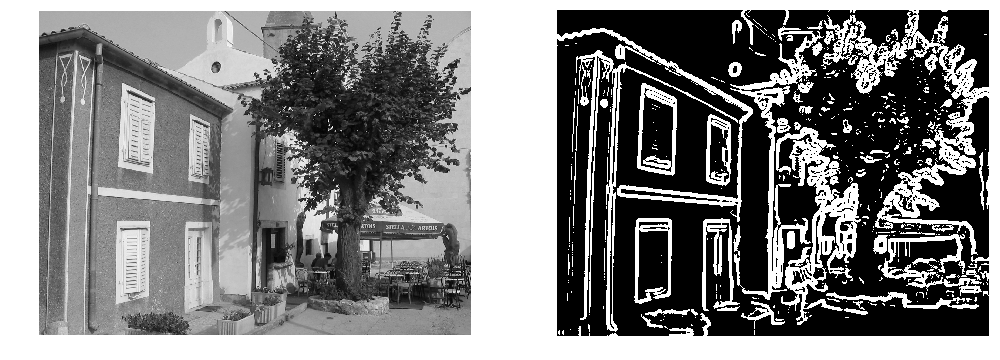

In [4]:
# Definimos un valor para el umbral
umb = 2.6

# Aplicamos el filtro de bordes en una imagen previamente filtrada
imagenConFiltroDeBordesConFiltroPrevio = filtroBordes(imagenConFiltroGaussiano, umbral=(umb or 3))


# Mostramos el filtro de bordes aplicando antes un filtro gaussiano
plt.figure(figsize=(17,17))
plt.subplot(121)
plt.imshow(imagenOriginal,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(imagenConFiltroDeBordesConFiltroPrevio,cmap = "gray")
plt.axis("off")
plt.show()

217.03916697223107 0.0


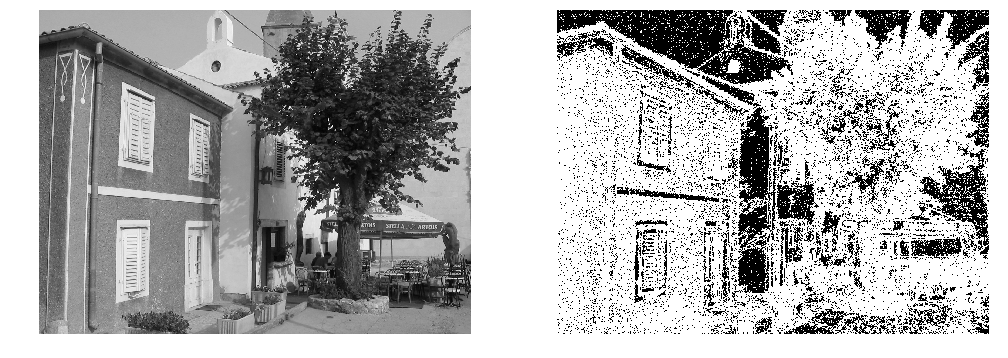

In [5]:
# Mostramos el filtro de bordes sin haber pasado antes por un filtro gaussiano
imagenConFiltroDeBordesSinFiltroPrevio = filtroBordes(imagenOriginal, umbral=(umb or 3))

plt.figure(figsize=(17,17))
plt.subplot(121)
plt.imshow(imagenOriginal,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(imagenConFiltroDeBordesSinFiltroPrevio,cmap = "gray")
plt.axis("off")
plt.show()

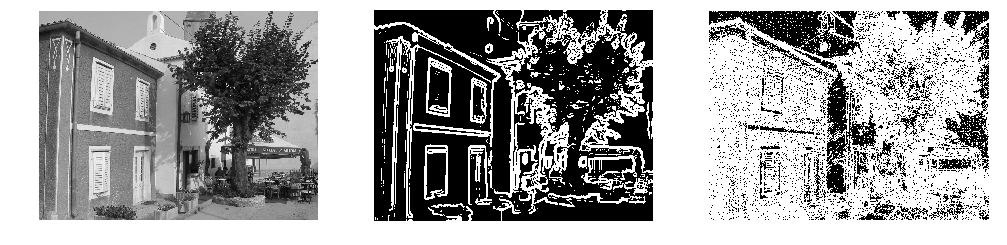

In [6]:
# Mostramos la diferencia entre los filtros
plt.figure(figsize=(17,17))
plt.subplot(131)
plt.imshow(imagenOriginal,cmap = "gray")
plt.axis("off")
plt.subplot(132)
plt.imshow(imagenConFiltroDeBordesConFiltroPrevio,cmap = "gray")
plt.axis("off")
plt.subplot(133)
plt.imshow(imagenConFiltroDeBordesSinFiltroPrevio,cmap = "gray")
plt.axis("off")
plt.show()